## Customer Segmentation using Clustering

This project applies unsupervised learning (KMeans clustering) to segment a customer base using demographic, behavioral, and marketing response data. The goal is to identify distinct customer profiles to support personalized marketing and resource optimization.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Overview

In [3]:
data =  pd.read_csv('data/customer_segmentation.csv')

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Data Overview

The dataset contains **2,240 customer records** and **29 features**, covering customer demographics, product purchase behavior, and marketing campaign responses.

- **Missing Data:** 24 missing values are present in the `Income` column.
- **Feature Types:**
  - **Numerical:** 26 columns (integer and float types), including spending amounts and campaign responses.
  - **Categorical:** 3 columns — `Education`, `Marital_Status`, and `Dt_Customer`.
- **Date Field:** `Dt_Customer` will be converted to a datetime format for time-based feature engineering.
- **Constant Columns:** `Z_CostContact` and `Z_Revenue` are constant values across all records and may be dropped.

---

### Feature Descriptions

- `ID`: Unique identifier for each customer.
- `Year_Birth`: Year of birth of the customer.
- `Education`: Education level of the customer.
- `Marital_Status`: Marital status of the customer.
- `Income`: Annual income (in monetary units).
- `Kidhome`: Number of children in the household aged under 12.
- `Teenhome`: Number of teenagers in the household aged 13–19.
- `Dt_Customer`: Date the customer joined the company database.
- `Recency`: Number of days since the last purchase.
- `MntWines`: Amount spent on wine.
- `MntFruits`: Amount spent on fruits.
- `MntMeatProducts`: Amount spent on meat.
- `MntFishProducts`: Amount spent on fish.
- `MntSweetProducts`: Amount spent on sweets.
- `MntGoldProds`: Amount spent on gold products.
- `NumDealsPurchases`: Number of purchases made during deals.
- `NumWebPurchases`: Purchases made via the website.
- `NumCatalogPurchases`: Purchases made via catalog.
- `NumStorePurchases`: Purchases made in-store.
- `NumWebVisitsMonth`: Website visits in the last month.
- `AcceptedCmp1–5`: Whether the customer accepted campaigns 1–5 (fIve different rows).
- `Complain`: Whether the customer has ever filed a complaint.
- `Z_CostContact`: Constant cost of contacting a customer.
- `Z_Revenue`: Constant revenue from a successful campaign.
- `Response`: Whether the customer responded to the last campaign.

---

This overview establishes a foundational understanding of the dataset before cleaning and feature engineering.


### Data Cleaning

#### Handling Missing Values

I want to use Median to fill in the `Income`missing values because there is a vast difference between the `min` and `max`

In [9]:
data['Income'].fillna(data['Income'].median(), inplace=True)

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\1942788488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)


In [10]:
data['Income'].isnull().sum()

0

#### Fixing Column Data Type
To convert `Dt_Customer` which is a string the sattime format

In [11]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

In [12]:
data['Dt_Customer'].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

#### Standadizing Categarical Columns
To ensure all text categories are consistent and clean.

In [13]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [14]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [16]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [17]:
# Clean education
data['Education'] = data['Education'].replace({
    'Basic': 'Basic',
    '2n Cycle': 'Secondary',
    'Graduation': 'Graduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

# Clean marital status
data['Marital_Status'] = data['Marital_Status'].replace({
    'Together': 'Married',
    'Married': 'Married',
    'Single': 'Single',
    'Alone': 'Single',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'YOLO': 'Other',
    'Absurd': 'Other'
})

In [18]:
data['Education'].value_counts()

Education
Graduate        1127
Postgraduate     856
Secondary        203
Basic             54
Name: count, dtype: int64

In [19]:
data['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Other          4
Name: count, dtype: int64

#### Dropping Irrelevant Columns
`ID` is just a unique identifier. And `Z_CostContact` and `Z_Revenue` are just constants with no variance.

In [20]:
data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

In [21]:
cleaned_data = data.copy()

In [22]:
cleaned_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduate,Married,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduate,Married,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [23]:
# Saving cleaned data to a new CSV file
cleaned_data.to_csv('cleaned_data.csv', index=False)

### Exploratory Data Analysis (EDA)

In this section, we aim to explore distributions, spot outliers, understand relationships, and uncover hidden patterns that will guide feature selection and clustering decisions later in the project.

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


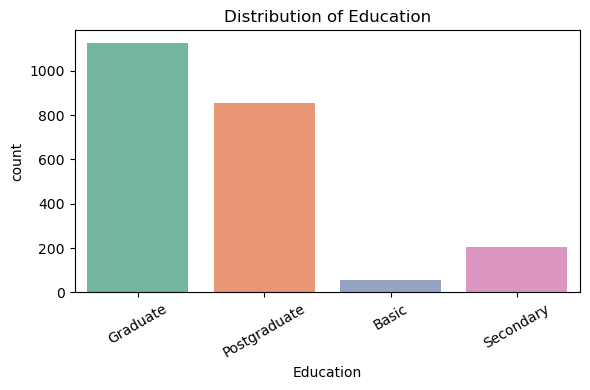

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


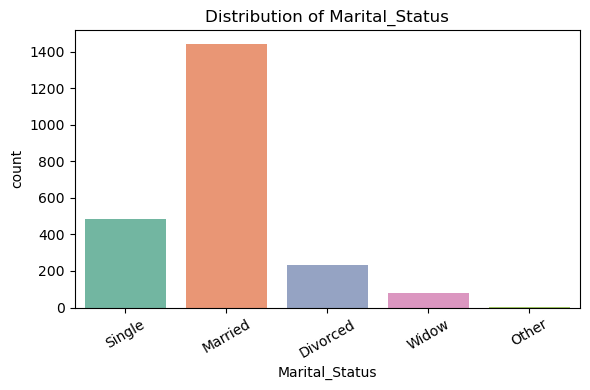

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


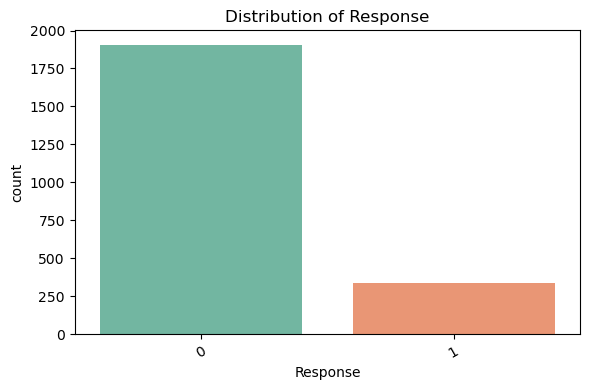

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


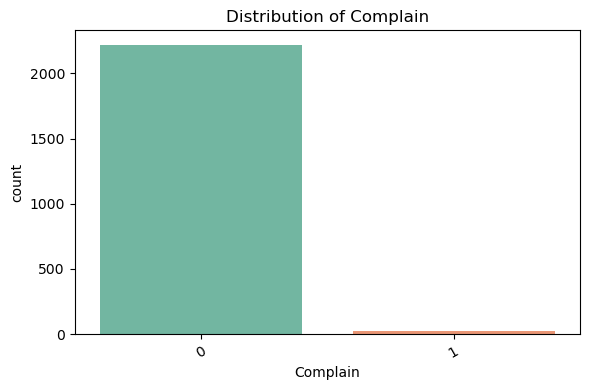

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


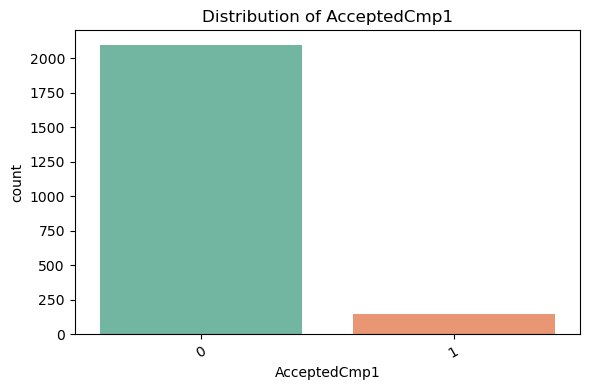

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


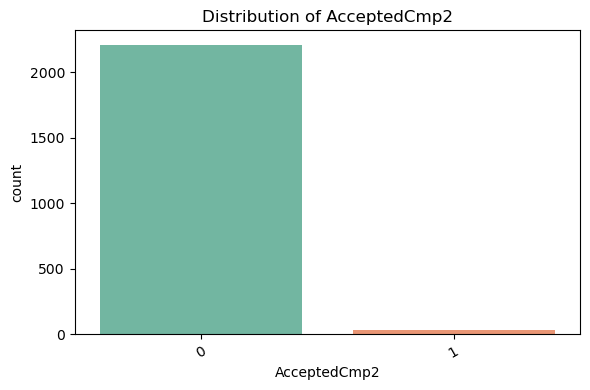

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


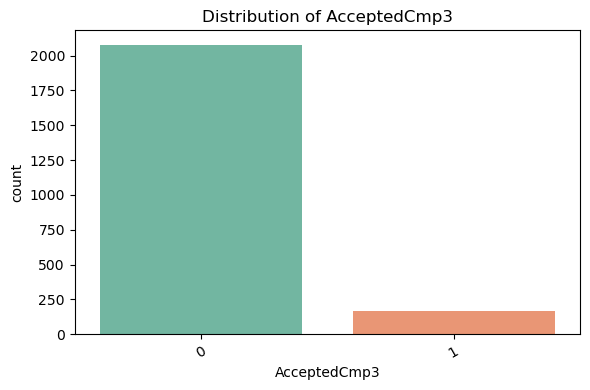

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


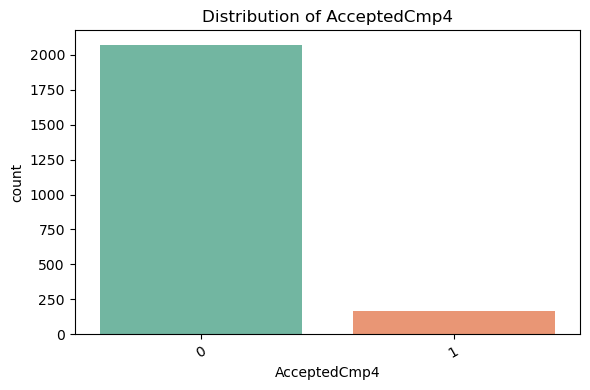

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


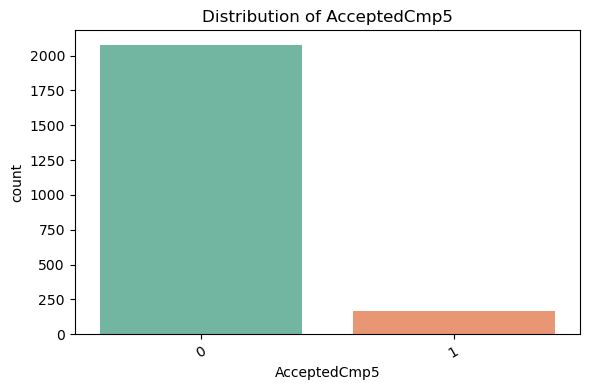

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


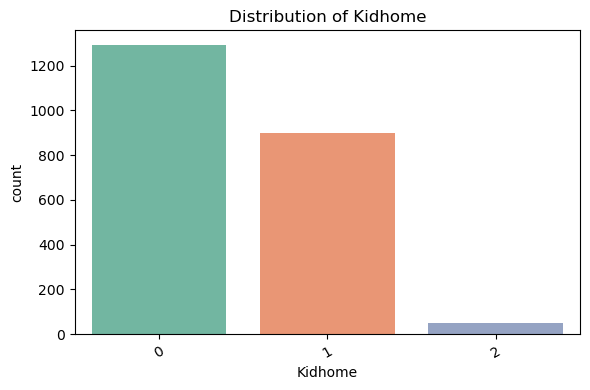

C:\Users\richm\AppData\Local\Temp\ipykernel_10728\3394887820.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data=cleaned_data, palette='Set2')


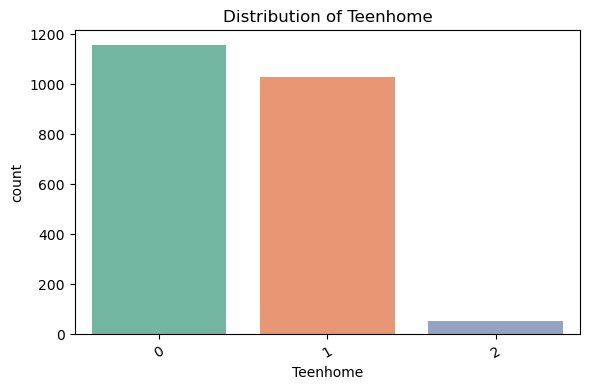

In [24]:
categorical_cols = [
    'Education', 'Marital_Status', 'Response', 'Complain',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome', 'Teenhome'
]

for cols in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=cols, data=cleaned_data, palette='Set2')
    plt.title(f'Distribution of {cols}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

In [25]:
# To see the frequency of each categorical column in the data
for col in categorical_cols:
	print(f"Value counts for '{col}':")
	print(cleaned_data[col].value_counts())
	print('-' * 40)

Value counts for 'Education':
Education
Graduate        1127
Postgraduate     856
Secondary        203
Basic             54
Name: count, dtype: int64
----------------------------------------
Value counts for 'Marital_Status':
Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Other          4
Name: count, dtype: int64
----------------------------------------
Value counts for 'Response':
Response
0    1906
1     334
Name: count, dtype: int64
----------------------------------------
Value counts for 'Complain':
Complain
0    2219
1      21
Name: count, dtype: int64
----------------------------------------
Value counts for 'AcceptedCmp1':
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
----------------------------------------
Value counts for 'AcceptedCmp2':
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64
----------------------------------------
Value counts for 'AcceptedCmp3':
AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

#### Summary of Categorical Variables (EDA)

- **Education:** Most customers are Graduates (1127), followed by Postgraduates (856), Secondary (203), and a small group with Basic education (54).
- **Marital Status:** Majority of customers are Married (1444), followed by Single (483), Divorced (232), Widow (77), and Other (4).
- **Marketing Response:** 334 customers responded to marketing campaigns, while 1906 did not.
- **Complain:** Only 21 customers have made complaints; the rest (2219) have not.
- **Campaign Acceptance (Cmp1–Cmp5):** Most campaigns had low acceptance. For example, Campaign 1 had only 144 acceptances out of 2240 customers.
- **Kidhome:** 1293 customers have no kids at home, 899 have 1, and 48 have 2.
- **Teenhome:** 1158 have no teens at home, 1030 have 1, and 52 have 2.

>  These summaries help us understand customer characteristics before moving into clustering.


#### Univariate Analysis: Numerical Features

In this section, we explore the distribution of numerical variables using histograms. This helps us identify patterns such as skewness, presence of outliers, and general shape of the data. 

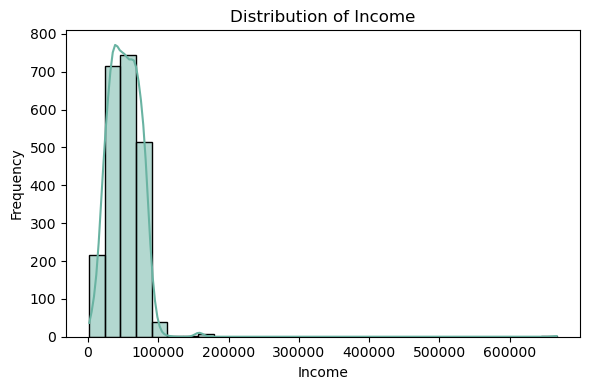

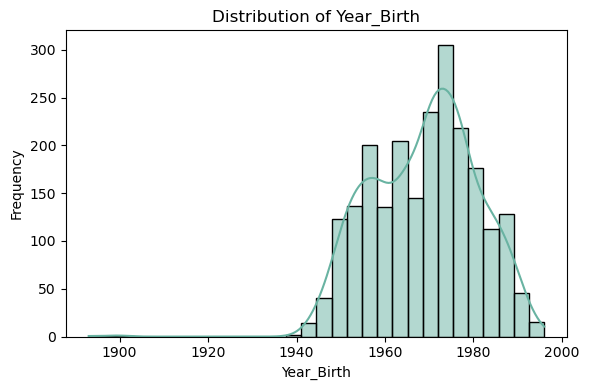

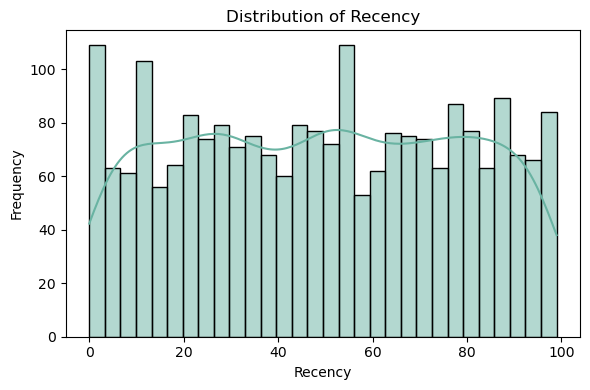

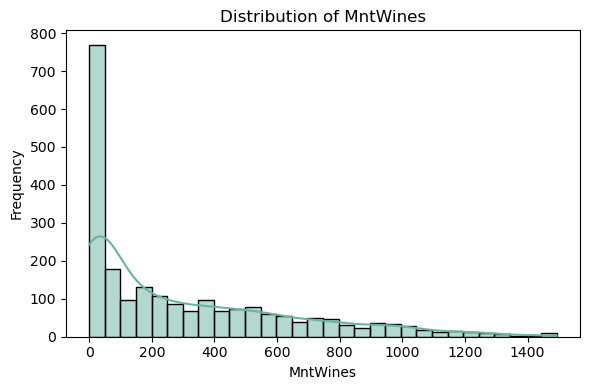

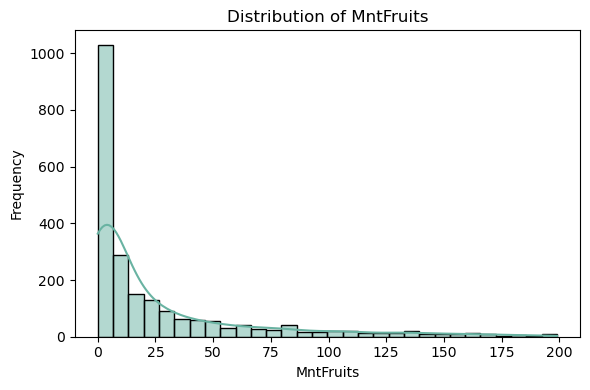

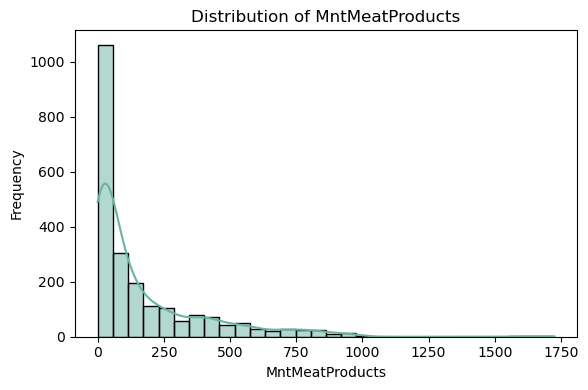

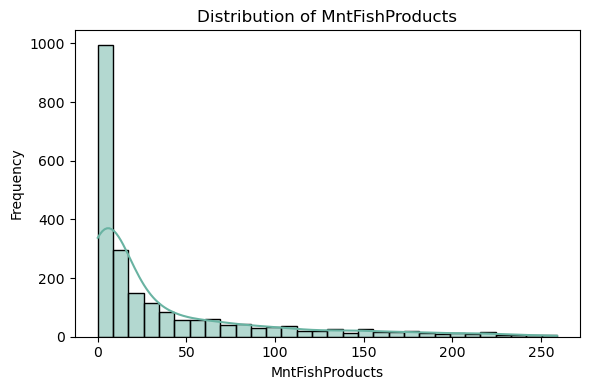

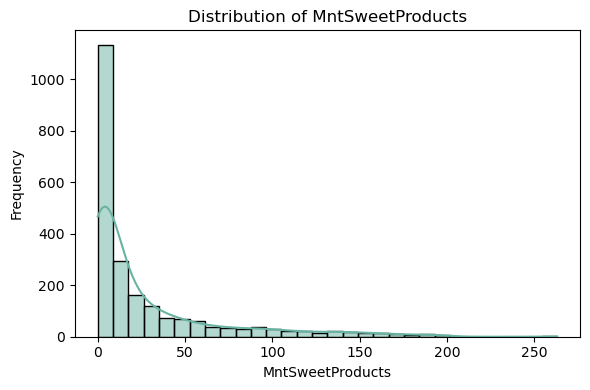

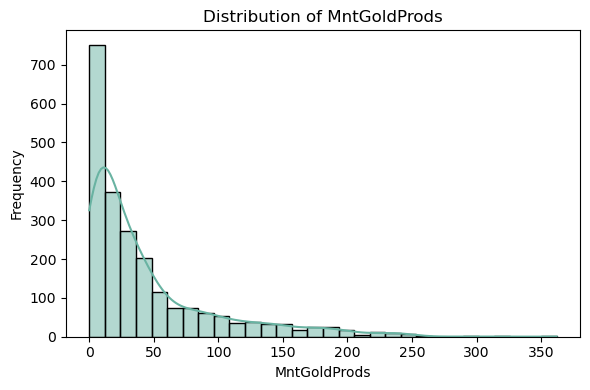

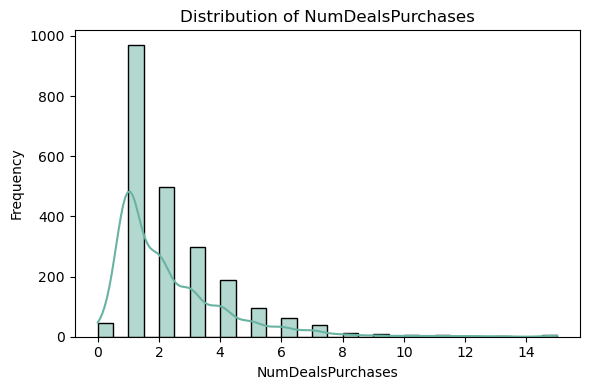

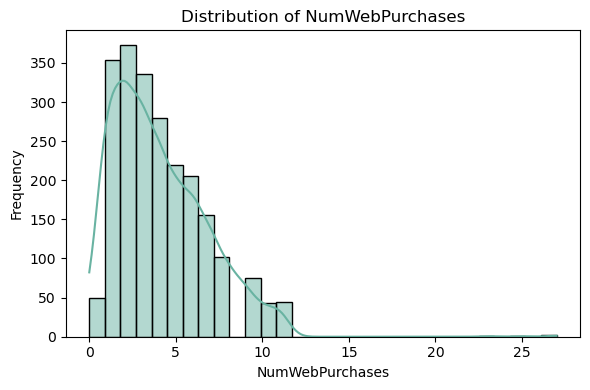

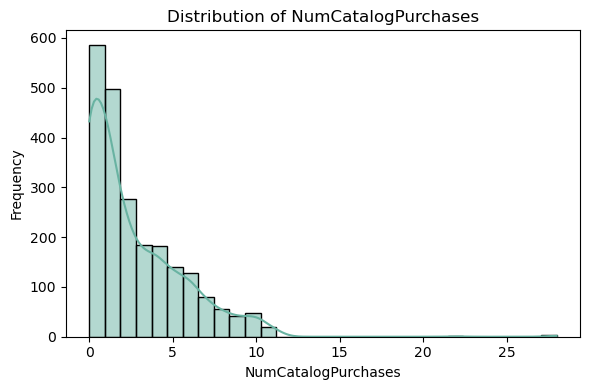

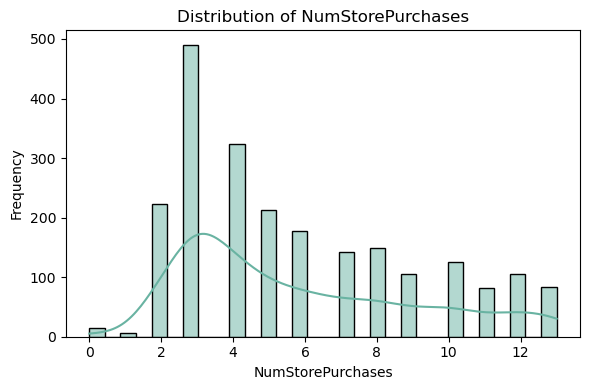

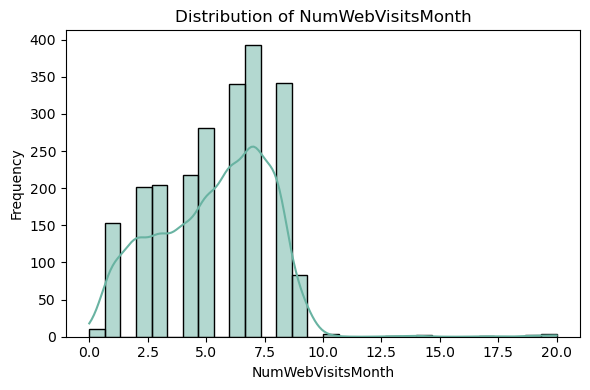

In [26]:
numerical_cols = [
    'Income', 'Year_Birth', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

for cols in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[cols], kde=True, bins=30, color='#69b3a2')
    plt.title(f'Distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#### Summary of Numerical Feature Distributions

We examined the distribution of key numerical features in the dataset. Here are the main insights:

- **Income**: Right-skewed. Most customers earn below 100,000, with a few extreme outliers — one customer earns over 600,000. The minimum income recorded is around 1,730.
- **Year_Birth**: Roughly normally distributed. Most customers were born around 1970. The youngest customer was born in 1996 and the oldest in 1893 — this suggests potential outliers or data quality issues that may need further review.
- **Recency**: Uniformly distributed from 0 to 99. This indicates a balanced mix of recent and older customer interactions, which is good for segmentation based on recency.
- **Customer Tenure (`Dt_Customer`)**: Most customers were enrolled in 2013. We'll later explore if earlier join dates correlate with different spending behaviors.
- **Spending Variables (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`)**: All show right-skewed distributions. A small group of high-spending customers may strongly influence segmentation.
- **Purchase Count Variables**:
  - `NumDealsPurchases`, `NumCatalogPurchases`: Strongly right-skewed. Most customers made very few purchases using deals or catalogs.
  - `NumWebPurchases`, `NumStorePurchases`, `NumWebVisitsMonth`: More balanced and closer to normal distribution with a slight right skew. Indicates more general consumer behavior.
- **Children at Home**:
  - `Kidhome` and `Teenhome` range from 0 to 2. Most customers have no children or only one child/teen at home. This might help identify household types in clustering.

> These insights provide a strong foundation for feature scaling, outlier handling, and building meaningful customer clusters.


#### Boxplots
Provides a visual summary of the distribution of numerical variables. They display:

- **Median (Q2)**: The center line in the box
- **Interquartile Range (IQR)**: The box itself, from the 25th percentile (Q1) to the 75th percentile (Q3)
- **Whiskers**: Extend to show the rest of the data within 1.5×IQR from the quartiles
- **Outliers**: Any points beyond the whiskers are considered potential outliers


In [28]:
cleaned_data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,11.984069,25037.955891,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274


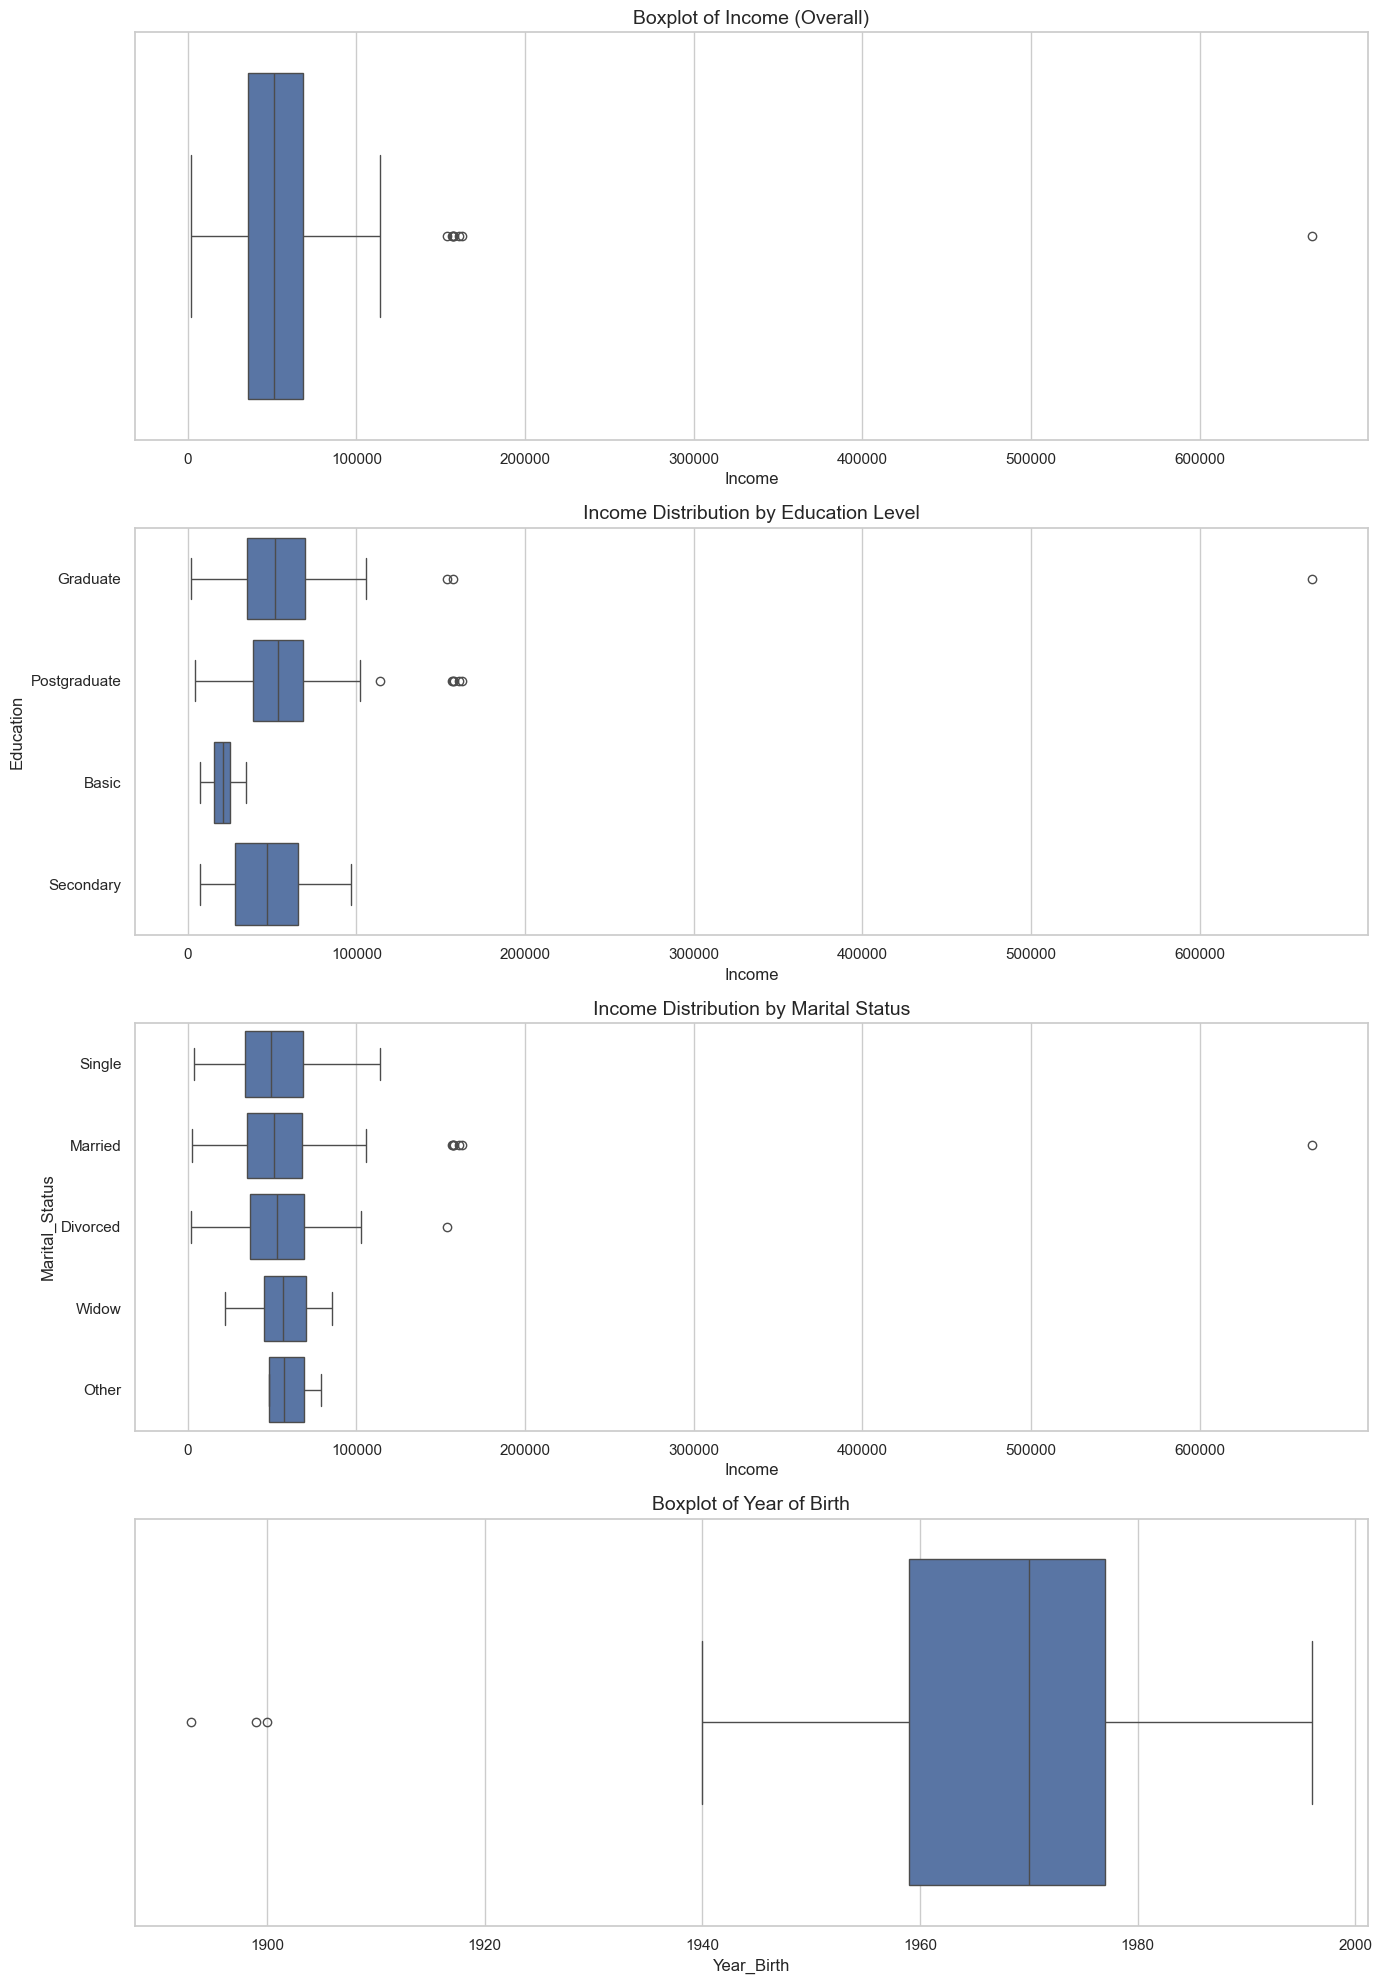

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 20))

# Boxplot 1: Income overall
plt.subplot(4, 1, 1)
sns.boxplot(x=cleaned_data['Income'])
plt.title("Boxplot of Income (Overall)", fontsize=14)

# Boxplot 2: Income by Education
plt.subplot(4, 1, 2)
sns.boxplot(x='Income', y='Education', data=cleaned_data)
plt.title("Income Distribution by Education Level", fontsize=14)

# Boxplot 3: Income by Marital Status
plt.subplot(4, 1, 3)
sns.boxplot(x='Income', y='Marital_Status', data=cleaned_data)
plt.title("Income Distribution by Marital Status", fontsize=14)

# Boxplot 4: Year of Birth
plt.subplot(4, 1, 4)
sns.boxplot(x=cleaned_data['Year_Birth'])
plt.title("Boxplot of Year of Birth", fontsize=14)

plt.tight_layout()
plt.show()

#### Boxplots: Outlier Detection and Income Comparison

Boxplots were used to examine the distribution and detect potential outliers in the dataset. Here are the key insights from the visualizations:

- **Income (Overall):** There are clear outliers above 100,000, including an extreme case of ~600,000, which is highly unusual compared to the rest of the data. Most incomes fall between 20,000 and 80,000.
- **Income by Education:** Income tends to increase with higher education levels. Postgraduates and graduates show a wider spread of income, while individuals with basic education have significantly lower and narrower income distributions.
- **Income by Marital Status:** Married and single individuals show higher and wider income distributions. Other marital statuses such as widow, divorced, or "Other" have more compact income ranges.
- **Year of Birth:** There are clear outliers below the year 1920 (e.g., 1893), which are likely data quality issues. Most customers were born between 1950 and 1980.

> These insights will help guide our understanding of customer segments and inform the data preparation strategy for clustering.

#### Correlation Analysis

In this section, we explore how numerical variables in the dataset relate to one another. This helps us identify strong positive or negative associations, multicollinearity, and patterns that may impact clustering performance.

We’ll use a correlation matrix with a heatmap to visualize the relationships between features. This can guide us in selecting relevant features and reducing redundancy before modeling.


C:\Users\richm\AppData\Local\Temp\ipykernel_10728\1945701375.py:13: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\richm\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


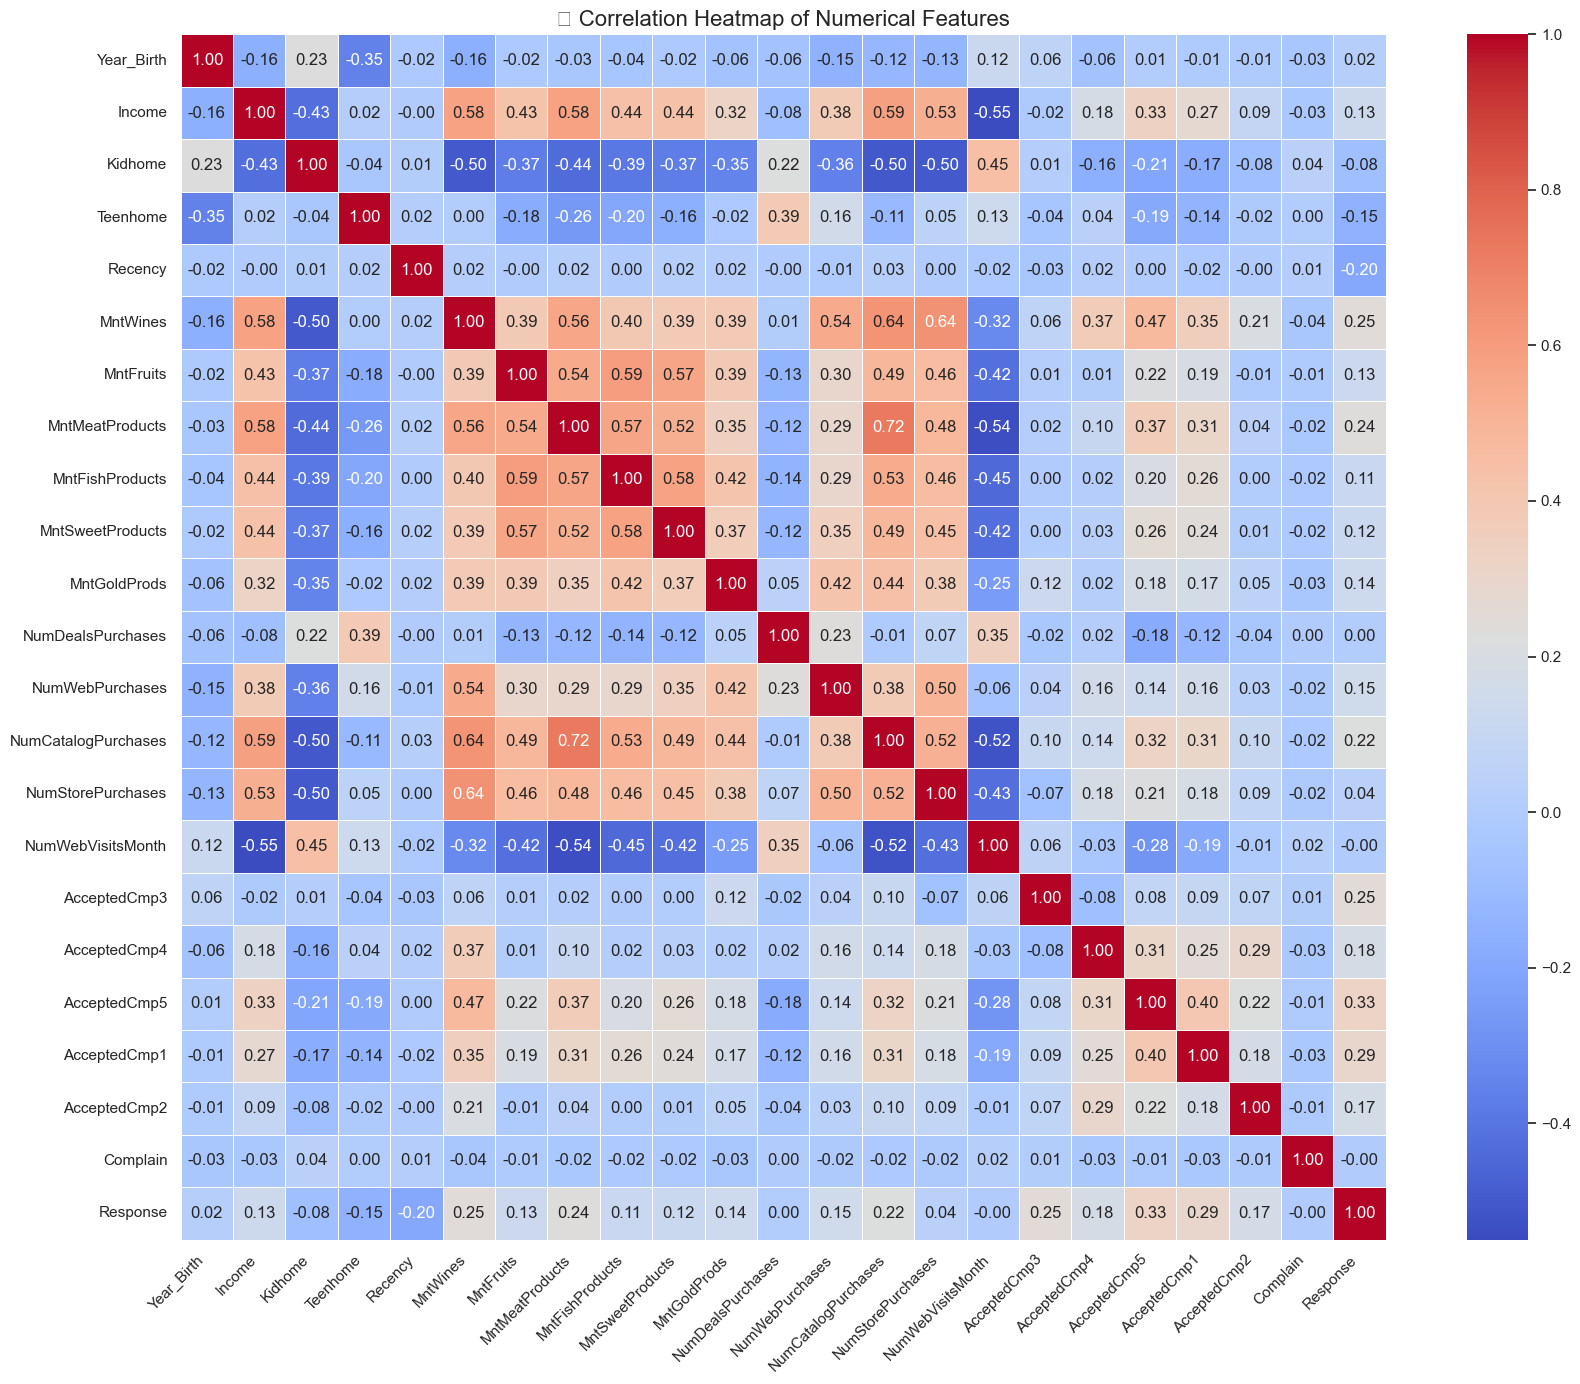

In [30]:
numerical_data = cleaned_data.select_dtypes(include=['int64', 'float64'])


# Compute correlation matrix
corr_matrix = numerical_data.corr()


plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Correlation Analysis Summary

From the correlation matrix, we observed the following key insights:

- **Highly Correlated Features**:
  - `MntWines`, `MntMeatProducts`, `MntGoldProds`, and `MntFishProducts` show strong positive correlations with each other (e.g., MntWines and MntMeatProducts: 0.66). This suggests a group of customers who consistently spend across various product categories.
  - `NumWebPurchases` and `NumCatalogPurchases` are moderately correlated (~0.38), indicating customers who shop online may also respond well to catalog campaigns.
  - `Income` is moderately correlated with spending on products like `MntWines` (0.64), `MntMeatProducts` (0.58), and `MntGoldProds` (0.44), which is expected — higher income generally means more spending.

- **Weak or Negative Correlations**:
  - `NumWebVisitsMonth` has a negative correlation with product spendings like `MntWines`, `MntMeatProducts`, and `MntGoldProds`, possibly indicating that frequent site visits don’t necessarily lead to purchases.
  - `Kidhome` and `Teenhome` show weak to moderate **negative** correlation with income and spending, implying that households with more children may spend less or earn less.

- **Target Variable (`Response`)**:
  - `Response` has weak but slightly positive correlation with campaign acceptances (`AcceptedCmp1–5`), as expected.
  - `Response` is very weakly correlated with product purchases and income, indicating that **other factors** (like marketing strategy, timing, or customer type) may influence campaign responses more than income or spending.

> These findings will help us in **feature selection**, **dimensionality reduction**, and in guiding marketing strategy or customer segmentation later.


### Feature Engineering and Data Preprocessing

This step involves preparing the dataset for clustering. Since clustering algorithms like KMeans are sensitive to feature scales and require numerical input, we need to transform our data appropriately.

Key actions in this phase include:
- Removing irrelevant or target-like columns (e.g., `Response`)
- Encoding categorical features (e.g., `Education`, `Marital_Status`)
- Transforming dates into meaningful numerical values (e.g., customer tenure)
- Scaling the dataset to standardize feature values

This ensures that all features contribute equally to the clustering process.

#### Dropping the `Response` Column

Since this is an unsupervised learning project focused on clustering, we do not need the `Response` column, which is typically used as a target variable in supervised learning tasks. Removing this column ensures that the clustering process remains unbiased and purely based on the features of the customers.

In [ ]:
cleaned_data = cleaned_data.drop(columns=['Response'])

#### Encoding Categorical Features

The dataset contains two categorical features: `Education` and `Marital_Status`. Since clustering algorithms like KMeans require numerical inputs and treat numeric values as distances, we use **One-Hot Encoding** to convert these categories into binary vectors. This avoids implying any ordinal relationship between the categories.


In [33]:
encoded_data = pd.get_dummies(cleaned_data, columns=['Education', 'Marital_Status'], drop_first=True)

In [34]:
encoded_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Education_Graduate,Education_Postgraduate,Education_Secondary,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Widow
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,True,False,False,False,False,True,False
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,0,0,0,True,False,False,False,False,True,False
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,0,0,0,True,False,False,True,False,False,False
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,0,0,True,False,False,True,False,False,False
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,0,0,0,False,True,False,True,False,False,False


In [35]:
# Convert all boolean columns (from get_dummies) to integers
encoded_data = encoded_data.astype({col: int for col in encoded_data.select_dtypes('bool').columns})

In [37]:
encoded_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Education_Graduate,Education_Postgraduate,Education_Secondary,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Widow
0,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,...,0,0,0,1,0,0,0,0,1,0
1,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,...,0,0,0,1,0,0,0,0,1,0
2,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,...,0,0,0,1,0,0,1,0,0,0
3,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,...,0,0,0,1,0,0,1,0,0,0
4,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,...,0,0,0,0,1,0,1,0,0,0


#### Transforming `Dt_Customer` to Customer Tenure

The `Dt_Customer` column represents the date each customer joined the company. Clustering algorithms require numerical input, so we transform this into a new feature called `Customer_Tenure`, which calculates the number of days since each customer joined. This provides a meaningful measure of customer loyalty.

In [38]:
from datetime import datetime

# Reference date (latest date in the dataset)
reference_date = encoded_data['Dt_Customer'].max()

# Calculate tenure in days
encoded_data['Customer_Tenure'] = (reference_date - encoded_data['Dt_Customer']).dt.days

# Drop the original Dt_Customer column
encoded_data = encoded_data.drop(columns=['Dt_Customer'])

In [39]:
encoded_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Education_Graduate,Education_Postgraduate,Education_Secondary,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Widow,Customer_Tenure
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,663
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,113
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,1,0,0,1,0,0,0,312
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,1,0,0,1,0,0,0,139
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,1,0,1,0,0,0,161


#### Feature Scaling

To prepare the dataset for clustering, all numerical features are standardized using `StandardScaler`. This ensures each feature contributes equally to the distance calculations used by algorithms like KMeans. Without scaling, features with larger magnitudes could disproportionately influence the results.


In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the encoded data
scaled_data = scaler.fit_transform(encoded_data)

# Convert back to DataFrame for readability (optional)
scaled_data = pd.DataFrame(scaled_data, columns=encoded_data.columns)

In [41]:
scaled_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,Complain,Education_Graduate,Education_Postgraduate,Education_Secondary,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Widow,Customer_Tenure
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,-0.11651,-0.097282,0.993769,-0.786446,-0.315684,-1.346874,-0.042295,1.907271,-0.188676,1.531185
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-0.11651,-0.097282,0.993769,-0.786446,-0.315684,-1.346874,-0.042295,1.907271,-0.188676,-1.190545
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,-0.11651,-0.097282,0.993769,-0.786446,-0.315684,0.742460,-0.042295,-0.524309,-0.188676,-0.205773
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.11651,-0.097282,0.993769,-0.786446,-0.315684,0.742460,-0.042295,-0.524309,-0.188676,-1.061881
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,-0.11651,-0.097282,-1.006270,1.271543,-0.315684,0.742460,-0.042295,-0.524309,-0.188676,-0.953012


### KMeans Clustering - Elbow Method

In this step, we apply the Elbow Method to identify the optimal number of clusters for KMeans clustering. 

The Elbow Method works by fitting the model with different values of `k` (number of clusters) and plotting the **inertia** (within-cluster sum of squares) for each value. The point where the inertia begins to decrease more slowly, forming an "elbow", indicates the optimal `k`.

This helps us balance model simplicity with good clustering performance.

c:\Users\richm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\richm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


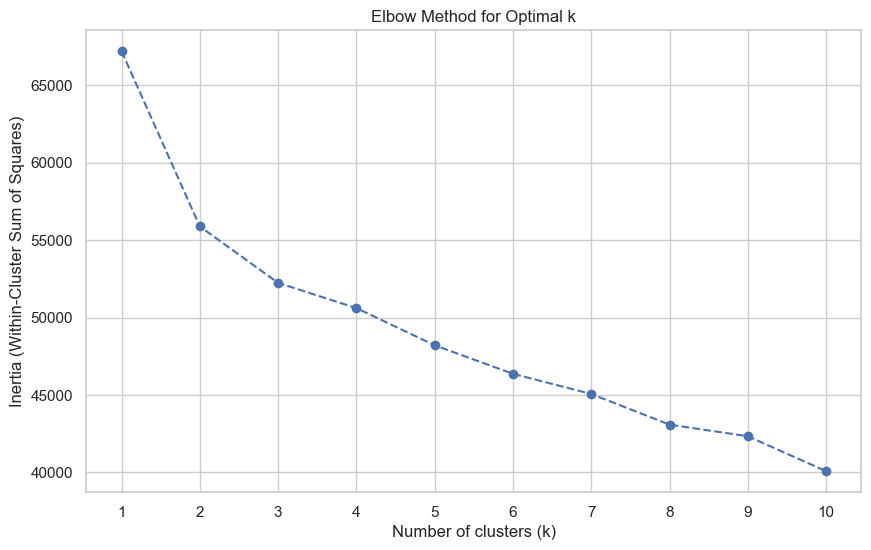

In [42]:
from sklearn.cluster import KMeans

# Setting range of k values to test
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.plot(K, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(K)
plt.show()

#### Elbow Method Summary
The graph shows that after k = 4, the drop in inertia slows down, meaning we get less improvement by adding more clusters.

We will test k = 4 and k = 5, as they are both in the "elbow region" where clustering performance balances well with simplicity. K-Means will assign each data point to the cluster with the nearest centroid, helping us segment the customers into distinct groups based on their behaviors.

In [43]:
from sklearn.cluster import KMeans

# Fit KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
encoded_data['Cluster_4'] = kmeans_4.fit_predict(scaled_data)

# Fit KMeans with k=5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
encoded_data['Cluster_5'] = kmeans_5.fit_predict(scaled_data)

encoded_data[['Cluster_4', 'Cluster_5']].head()

,Cluster_4,Cluster_5
0,2,2
1,3,3
2,1,2
3,3,3
4,3,4


#### K-Means Clustering (k=4 and k=5)

In this step, we applied the K-Means clustering algorithm using the scaled dataset to segment customers into distinct groups based on their attributes and behaviors.

We fitted two models:
- **KMeans (k=4)**: to create 4 customer segments.
- **KMeans (k=5)**: to create 5 customer segments.

Each customer is now assigned a cluster label under both configurations. These labels represent the group that customer belongs to, based on similarities in their profile and purchasing patterns.

This setup allows us to analyze the clusters in the next step and identify meaningful customer personas.

#### Cluster Profiling - K-Means with 5 Clusters

In [46]:
# Using the cluster labels already present in encoded_data
cluster_4_data = encoded_data.copy()

# Grouping by Cluster_4 and calculating the mean of each feature
cluster_4_summary = cluster_4_data.groupby('Cluster_4').mean().round(2)

# Displaying summary
cluster_4_summary.T  

Cluster_4,0,1,2,3
Year_Birth,1973.38,1963.84,1968.67,1971.39
Income,39080.25,58100.31,77536.06,35504.28
Kidhome,0.63,0.22,0.04,0.80
Teenhome,0.45,0.92,0.16,0.45
Recency,50.35,48.40,49.79,48.97
MntWines,87.03,473.52,613.38,44.29
MntFruits,15.68,21.93,69.97,4.93
MntMeatProducts,60.91,139.44,466.53,24.14
MntFishProducts,27.06,29.71,100.49,6.91
MntSweetProducts,15.88,23.42,71.41,4.90


#### Cluster Profiling Summary: K-Means with 4 Clusters 
We grouped the customers into 4 distinct clusters based on their demographic attributes, purchasing behavior, and marketing campaign responses using K-Means. The table below summarizes the average feature values per cluster.

**Key Insights:**
**Cluster 0** appears to consist of younger customers (avg. birth year ~1973), with low income and moderate deal purchases, but low overall spending.

**Cluster 1** customers are slightly older (~1963), with high income, high store and online purchases, and strong response rates to campaigns. This cluster may represent loyal and high-value customers.

**Cluster 2** is the most affluent group, with the highest income (~77K) and very high spending across all product categories. They also have the highest acceptance of marketing campaigns — making them ideal for targeted offers.

**Cluster 3** represents lower-income customers (~35K), with high number of children at home, low spending, and low campaign engagement. These may require different marketing strategies or could be less engaged customers.

#### Cluster Profiling – K-Means with 5 Clusters

In [47]:
cluster_5_data = encoded_data.copy()

cluster_5_summary = cluster_5_data.groupby('Cluster_5').mean().round(2)

cluster_5_summary.T

Cluster_5,0,1,2,3,4
Year_Birth,1973.53,1969.37,1967.94,1971.52,1963.74
Income,38993.35,81544.52,74345.19,35077.87,57100.05
Kidhome,0.64,0.05,0.05,0.81,0.23
Teenhome,0.45,0.14,0.25,0.44,0.93
Recency,50.44,49.88,49.63,48.77,48.66
MntWines,84.38,877.19,501.29,41.71,454.56
MntFruits,15.64,56.69,71.72,4.55,19.35
MntMeatProducts,59.74,461.72,435.52,23.25,127.12
MntFishProducts,26.87,76.25,105.47,6.58,25.18
MntSweetProducts,15.27,64.57,73.12,4.69,18.77


#### Cluster Profiling Summary – K=5 (Five Clusters)

We grouped the customers into 5 clusters using K-Means and analyzed their average characteristics. Below is a summary of insights from the `Cluster_5` analysis:

- **Cluster 0**:  
  - Lowest income group (~39k).  
  - Mostly younger customers (born ~1973), larger families.  
  - Very low spending across all categories.  
  - Education: all secondary.  
  - Hardly respond to campaigns.

- **Cluster 1** (High-Value Customers):  
  - Highest income group (~81k).  
  - Highest spenders in all product categories.  
  - Responded most to campaigns (e.g., 95% accepted Campaign 5).  
  - Fewer kids and teens at home.  
  - Well-educated: mostly graduates/postgraduates.  
  - Lower number of web visits, perhaps because they buy efficiently.

- **Cluster 2**:  
  - Mid-high income (~74k), older customers.  
  - High spenders but slightly lower than Cluster 1.  
  - Less responsive to campaigns.  
  - Education still high, and shopping patterns very active.

- **Cluster 3**:  
  - Very low income (~35k), large families.  
  - Lowest spenders overall.  
  - Little to no campaign engagement.  
  - Possibly price-sensitive or disengaged customers.

- **Cluster 4**:  
  - Mid-income (~57k), older with no kids.  
  - Good spending profile, especially in meat and store purchases.  
  - High store shoppers, high tenure.  
  - Campaign response is moderate.

This deeper clustering gives the marketing team and business executives a detailed segmentation to tailor promotions and improve personalization.

#### Cluster Selection Decision: K=4 (Cluster_4)

After comparing both clustering solutions (K=4 and K=5), we selected **Cluster_4 (K=4)** as the optimal choice for our segmentation. This decision is based on the following key reasons:

- **Clearer Segmentation**: Cluster_4 shows distinct and well-separated customer groups with minimal overlap.
- **Business Interpretability**: Easier to understand and explain to stakeholders, especially for marketing and executive teams.
- **Actionability**: Enables straightforward targeting strategies and customer profiling for campaigns.
- **Balanced Grouping**: Each cluster is meaningful in terms of demographics, income, and purchasing behavior.

Cluster_5 provides more granular insights, but Cluster_4 offers the best balance between depth and simplicity — making it ideal for actionable business insights and dashboard visualization.

We will proceed with **Cluster_4** for the rest of our analysis.

#### Customer Profiling by Cluster_4

To better understand our customer segments, we calculate the average values of key demographic, behavioral, and campaign-related features for each cluster. These profiles will help us interpret the characteristics of each group and guide future marketing decisions.

The resulting table highlights which cluster has higher spending habits, larger families, better campaign response rates, or higher online engagement.

In [48]:
# Group by Cluster_4 and calculate the mean of selected important features
profile_columns = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 
    'MntWines', 'MntMeatProducts', 'MntFishProducts', 
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'Customer_Tenure'
]

cluster_profiles = encoded_data.groupby('Cluster_4')[profile_columns].mean().round(2).T
cluster_profiles

Cluster_4,0,1,2,3
Income,39080.25,58100.31,77536.06,35504.28
Kidhome,0.63,0.22,0.04,0.80
Teenhome,0.45,0.92,0.16,0.45
Recency,50.35,48.40,49.79,48.97
MntWines,87.03,473.52,613.38,44.29
MntMeatProducts,60.91,139.44,466.53,24.14
MntFishProducts,27.06,29.71,100.49,6.91
NumWebPurchases,2.86,6.38,5.14,2.15
NumCatalogPurchases,1.06,3.19,6.05,0.57
NumStorePurchases,4.26,7.80,8.34,3.21


#### Customer Segmentation Profiles (Cluster_4)

We segmented customers into 4 distinct clusters using K-Means clustering. Here's a summary of each group based on key demographic and behavioral features:

#### 🔹 Cluster 0 – **Budget-Conscious Families**
- **Lower Income** (~39k)
- Moderate **children at home**
- Low to moderate **spending** across all product categories
- Low campaign acceptance
- Low online activity
- Ideal for **budget-friendly bundles** and **family promotions**

#### 🔹 Cluster 1 – **Moderate Income, Active Shoppers**
- Income: ~58k  
- High number of **Teenhome**
- High spending across **all categories**
- High web/catalog/store engagement
- **Responsive to campaigns** (moderate acceptance rates)
- Great for **digital marketing** and **loyalty programs**

#### 🔹 Cluster 2 – **Affluent and Highly Engaged Customers**
- Highest income (~77.5k)
- Few children
- Very high spending across **wines, meats, gold products**
- High campaign response (esp. **Cmp1 & Cmp5**)
- Most **digitally engaged**
- Target with **premium offers**, **exclusive clubs**, and **high-end promotions**

#### 🔹 Cluster 3 – **Low Income, Low Engagement**
- Lowest income (~35.5k)
- Most children (both Kidhome and Teenhome)
- Very low spending across all products
- Almost no campaign response
- Low digital activity
- May need **re-engagement strategies** or **basic discount offers**

Each profile offers a unique opportunity to tailor campaigns, pricing, and product strategies to better serve the needs and potential of the group.

In [52]:
cluster_4_data.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduate,Education_Postgraduate,Education_Secondary,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Widow,Customer_Tenure,Cluster_4,Cluster_5
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,0,1,0,663,2,2
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,1,0,113,3,3
2,1965,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,1,0,0,0,312,1,2
3,1984,26646.0,1,0,26,11,4,20,10,3,...,1,0,0,1,0,0,0,139,3,3
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,1,0,0,0,161,3,4


In [53]:
cluster_4_data = cluster_4_data.drop(columns=['Cluster_5'])

### Final Clustered Dataset for Business Use

We appended the cluster labels (`Cluster_4`) from the encoded dataset to the original clean dataset. This version retains all human-readable features (like Education, Marital Status, etc.), making it ideal for business interpretation and dashboard creation.

The final file `final_clustered_data.csv` contains:
- Cleaned and readable customer information
- A `Cluster` column showing the assigned segment (0–3)

In [56]:
# Copy clean_data and add Cluster_4 labels from encoded_data
final_clustered_data = cleaned_data.copy()
final_clustered_data['Cluster'] = encoded_data['Cluster_4']

# Export to CSV
final_clustered_data.to_csv("final_clustered_data.csv", index=False)

In [58]:
print(final_clustered_data.head())

   Year_Birth     Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957      Graduate         Single  58138.0        0         0   
1        1954      Graduate         Single  46344.0        1         1   
2        1965      Graduate        Married  71613.0        0         0   
3        1984      Graduate        Married  26646.0        1         0   
4        1981  Postgraduate        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7      